# <font color="hotpink"> Exploratory Data Analysis on Sleep Data </font>

* Data collected from a survey-based study of the sleeping habits of individuals within the US. Here is a description of each of the variables contained within the dataset:
    1. Enough = Do you think that you get enough sleep?
    2. Hours = On average, how many hours of sleep do you get on a weeknight?
    3. PhoneReach = Do you sleep with your phone within arms reach?
    4. PhoneTime = Do you use your phone within 30 minutes of falling asleep?
    5. Tired = On a scale from 1 to 5, how tired are you throughout the day? (1 being not tired, 5 being very tired)
    6. Breakfast = Do you typically eat breakfast?

Source: [Kaggle](https://www.kaggle.com/datasets/mlomuscio/sleepstudypilot)

## <font color="#fe741"> Importing required packages </font> 

In [1]:
! python --version

Python 3.11.7


In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import statistics
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# This will hide all Jupyter Notebook warnings.
warnings.filterwarnings('ignore')

print(" Versions ".center(16, "-"))
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("seaborn", sns.__version__)

# magic command to show matplotlib o/p into the same shell that we are running and not in a separate output window. 
%matplotlib inline

--- Versions ---
numpy 1.26.4
pandas 2.1.4
seaborn 0.12.2


## <font color="#fe7401"> Importing Dataset </font>

In [3]:
df = pd.read_csv("./datasets/SleepStudyData.csv")
df.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
1,No,6.0,Yes,Yes,3,No
2,Yes,6.0,Yes,Yes,2,Yes
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes


In [4]:
df.tail()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
99,No,7.0,Yes,Yes,2,Yes
100,No,7.0,No,Yes,3,Yes
101,Yes,8.0,Yes,Yes,3,Yes
102,Yes,7.0,Yes,Yes,2,Yes
103,Yes,6.0,Yes,Yes,3,Yes


## <font color="#fe7401"> Getting insights about the dataset </font>

In [5]:
# shape of dataset -> (rows, cols)
df.shape

(104, 6)

In [6]:
# showing statistical data like percentile, mean, etc. of numerical data.
df.describe()

,Hours,Tired
count,102.000000,104.000000
mean,6.656863,3.076923
std,1.417676,1.011510
min,2.000000,1.000000
25%,6.000000,2.000000
50%,7.000000,3.000000
75%,7.000000,4.000000
max,10.000000,5.000000


In [7]:
# columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Enough      104 non-null    object 
 1   Hours       102 non-null    float64
 2   PhoneReach  104 non-null    object 
 3   PhoneTime   104 non-null    object 
 4   Tired       104 non-null    int64  
 5   Breakfast   104 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.0+ KB


In [8]:
# check if there are any missing values in our dataset or not.
df.isnull().sum()

Enough        0
Hours         2
PhoneReach    0
PhoneTime     0
Tired         0
Breakfast     0
dtype: int64

We can see that there are two null values in `Hours` column. Let's check the mean, median and mode of the `Hours` feature.

In [9]:
print("Number of rows in 'Hours' feature:", df["Hours"].count())
print("Mean:", round(np.mean(df["Hours"]), 1))
print("Median:", statistics.median(df["Hours"]))
print("Mode: %.1f and values count: %d" % (stats.mode(df["Hours"])))

Number of rows in 'Hours' feature: 102
Mean: 6.7
Median: 7.0
Mode: 7.0 and values count: 35


As we can see that, about 34% of the Hour values is 7 ie. the mode value and mean is also very close to 7. Let’s try to fill the missing values of Hours with the float value 7.0.

In [10]:
df["Hours"].dtype

dtype('float64')

In [11]:
df["Hours"].fillna(7.0, inplace = True) 
df.isnull().sum()

Enough        0
Hours         0
PhoneReach    0
PhoneTime     0
Tired         0
Breakfast     0
dtype: int64

## <font color="#fe7401"> Visualizing the relations </font>

In [12]:
sns.set_theme(style='white', font_scale=0.8)

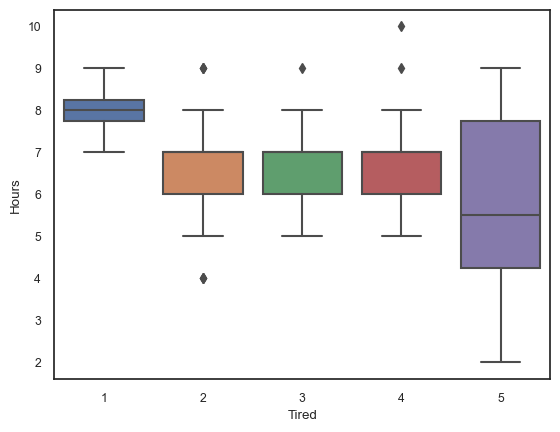

In [13]:
sns.boxplot(x='Tired', y='Hours', data=df)
plt.show()

Above plot shows that person who sleeps 6 to 8 hours has less tired rate and people who sleep more than that and less than that have more tired rate.

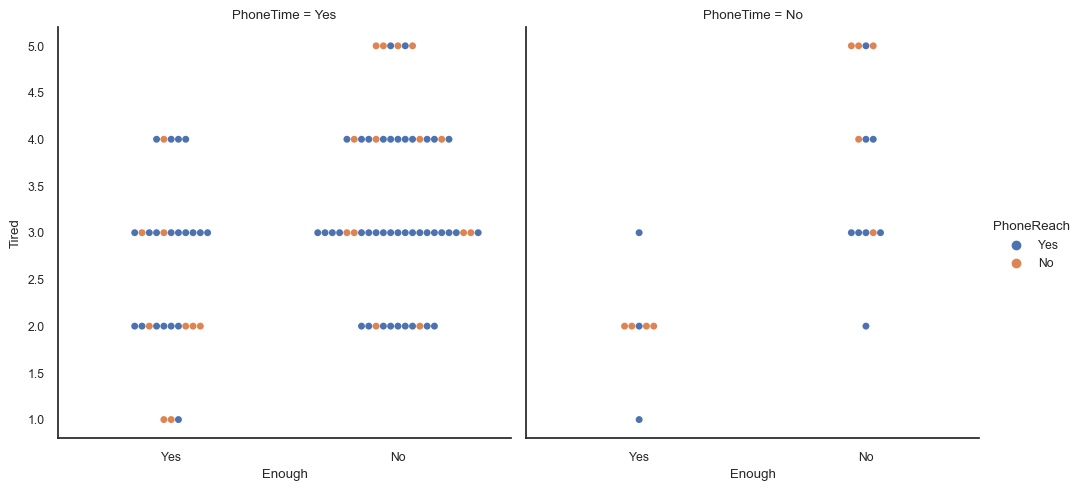

In [14]:
# swarm plot used which is kind of strip plot but with non-overlapping points
sns.catplot(x="Enough", y="Tired", col="PhoneTime", hue="PhoneReach", data=df, kind="swarm")

# Display all open figures
plt.show()

* As we can see, relation between using phone before 30 min falling asleep and phone is in reach doesn't very correlate to tiredness and enough sleep.
* Now let's try to visualize with breakfast. 

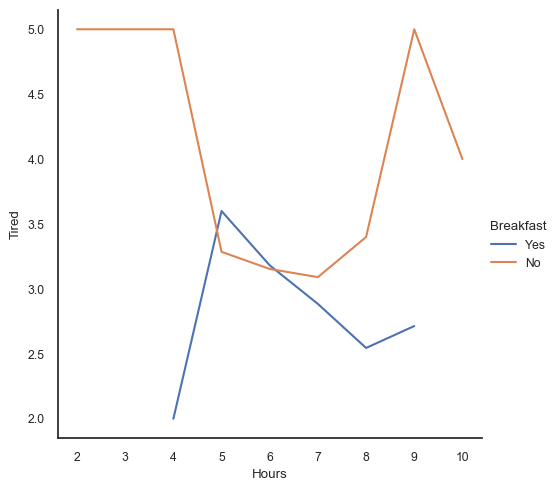

In [15]:
# Relational Plot (relplot) allows us to visualise how variables within a dataset relate to each other.
sns.relplot(x="Hours", y="Tired", ci=None, kind="line", hue="Breakfast", data=df)
plt.show()

### <font color="red"> Conclusion: </font>
* Individuals who eat breakfast and have 7-8 hours of sleep, feels less tired in comparison with individuals who doesn't eat breakfast.
* Person who sleeps 6 to 8 hours has less Tired Rate
* And People who sleep more than that and less than that have more Tired Rate.